# Regresión Lineal Simple, Sergio Alejandro Zamora Dávila


Importo pandas, e ingreso al archivo Felicidad.csv que es el que cuenta con toda la información, además de que utilizando la función sort_values() imprimo 2 tablas, una siendo la de felicidad de mayor a menor y la otra la de GDP igualmente de menor

In [9]:
# Importo la librería pandas
import pandas as pd
# Leo los datos
df = pd.read_csv("Felicidad.csv")
# Imprimo en consola un resumen de 10 filas de la base de datos, previamente ordenada de mayor a menor felicidad, esto lo logro usando la función sort_values()
print(df.sort_values("Felicidad", ascending=False).head(10))
#Como no me gusta que las tablas se vean tan juntas le añadí un \n
print("\n") 
print("\n")
# Hago lo mismo pero ahora con el valor "GDP"
print(df.sort_values("GDP", ascending=False).head(10))
print("\n")

          Pais  Felicidad           GDP
0      Finland     7.8210  2.718370e+11
1      Denmark     7.6362  3.560850e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.522480e+11
4  Netherlands     7.4149  9.138650e+11
5   Luxembourg     7.4040  7.335313e+10
6       Sweden     7.3843  5.414870e+11
7       Norway     7.3651  3.621980e+11
8       Israel     7.3638  4.071010e+11
9  New Zealand     7.1998  2.117350e+11




               Pais  Felicidad           GDP
15    United States     6.9768  2.089370e+13
70            China     5.5853  1.468770e+13
52            Japan     6.0389  5.040110e+12
13          Germany     7.0341  3.846410e+12
16   United Kingdom     6.9425  2.756900e+12
130           India     3.7771  2.667690e+12
19           France     6.6867  2.630320e+12
29            Italy     6.4667  1.892570e+12
14           Canada     7.0251  1.645420e+12
57      South Korea     5.9351  1.637900e+12




Se importa numpy para poder usar el logaritmo base 10, esto ya que los valores de GDP contiene números muy grandes, así que cuando se trabaja este tipo de números es común encontrar asociaciones utilizando el logaritmo base 10. 


Después de ello se utiliza matplotlib.pyplot para poder hacer una gráfica con los valores de Felicidad como Y (siendo este valor dependiente de X) y log10(GDP) la X (ya que se esta buscando si este valor tiene una relación directa con el nivel de Felicidad)

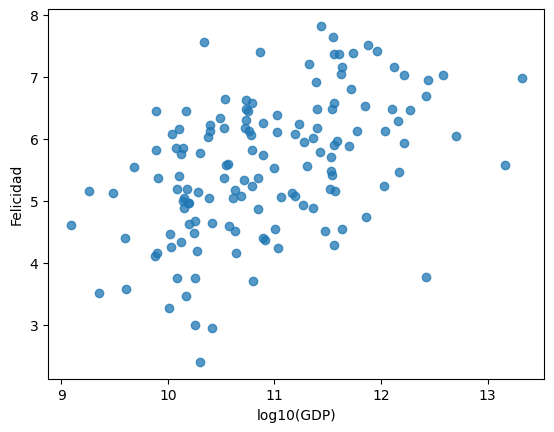

In [2]:
import numpy as np
x = np.log10(df.GDP)
y = df.Felicidad

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x, y, alpha=0.75)
plt.ylabel("Felicidad")
plt.xlabel("log10(GDP)")
plt.show()

Se calculan los valores de B0 y B1, siendo B0 el valor de Y cuando X valga 0 y B1 el valor de la pendiente de la función que estamos buscando.

Realizo este proceso "a mano", ya que al ser la primera vez que realizo un trabajo por el estilo me es más valioso hacerlo "a mano" para poder entender de mejor manera lo que se está haciendo.

In [3]:
xBar = np.mean(x)
yBar = np.mean(y)
B1num = sum((x-xBar)*(y-yBar))
B1den = sum((x-xBar)**2)
B1 = B1num / B1den
B0 = yBar - (B1*xBar)
print("B0 =",B0)
print("B1 =",B1)

B0 = -1.3023500570747277
B1 = 0.6281284658810408


Ahora que se han calculado los valores de la función, grafico de nuevo los valores de Felicidad y de log10(GDP), pero ahora también con la función que calculé.


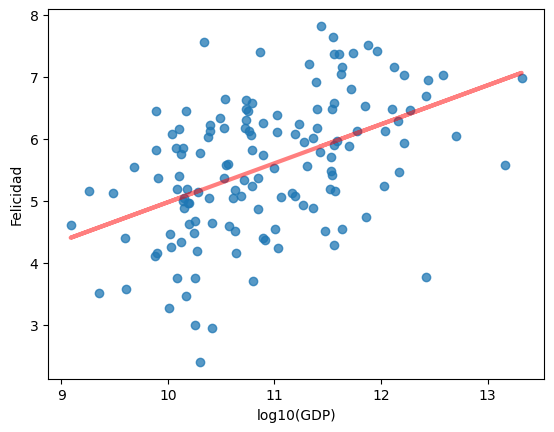

In [4]:
# Código para replicar la gráfica anterior con la recta de regresión
plt.scatter(x, y, alpha=0.75)
plt.ylabel("Felicidad")
plt.xlabel("log10(GDP)")
yHat = B0 + B1*x
plt.plot(x, yHat, c = "r", linewidth = 3, alpha = 0.5)
plt.show()

Calculo el valor de RSS del modelo y lo imprimo en consola.

In [5]:
RSS = sum((y - yHat)**2)
print("RSS =", RSS)

RSS = 131.3738317732635


En este apartado calculo el error estándar de la pendiente, así como su intervalo de confianza. Esto permite estimar con qué precisión se calculó la pendiente de la recta y si la relación entre la felicidad y el logaritmo del GDP es estadísticamente significativa.

Después se calcula el estadístico t y el valor p. Si el valor p es menor a 0.05, se puede concluir que sí existe una relación significativa entre la felicidad y log10(GDP); en caso contrario, no habría evidencia suficiente para afirmarlo.

In [6]:
n = len(x)
SEB1 = np.sqrt(RSS / ((n-2)*sum((x-xBar)**2)))
print("SEB1 =", SEB1)
print("\n")

import scipy.stats as st
per = st.t.interval(0.95, df = n-2)[1]
CIlow = B1 - per*SEB1
CIhigh = B1 + per*SEB1
print("Intervalo de confianza calculado: (",CIlow,",",CIhigh,")")

t = B1 / SEB1
p = st.t.sf(abs(t),n-2)*2
print("\n")
print("t-statistic =",t)
print("\n")
print("p-value =",p)

print("\n")
if p < 0.05:
    print("Conclusión: Existe una asociación significativa entre Felicidad y log10(GDP).")
else:
    print("Conclusión: No hay evidencia de asociación significativa.")

print("\n")


SEB1 = 0.09983378435340727


Intervalo de confianza calculado: ( 0.4307393313073311 , 0.8255176004547504 )


t-statistic = 6.291742519320846


p-value = 3.825717831968765e-09


Conclusión: Existe una asociación significativa entre Felicidad y log10(GDP).




Se calcula el Residual Standard Error (RSE), que mide qué tan alejados están los puntos observados de la recta estimada, y el R², que indica qué fracción de la variabilidad de la felicidad está siendo explicada por el modelo.

En el cálculo de R² se utiliza primero el TSS (Total Sum of Squares) y después se compara con el RSS que ya había calculado. Finalmente se interpreta el valor de R² para comentar si el modelo explica suficientemente bien la variabilidad observada.

In [7]:
RSE = np.sqrt(RSS/(n-2))
TSS = sum((y-yBar)**2)
R2 = 1 - RSS/TSS
print("Residual standard error =",RSE)
print("R^2 =",R2)

Residual standard error = 0.9721807858537376
R^2 = 0.22166361654970657


Finalmente, para comprobar que los cálculos manuales son correctos, se utiliza la función OLS() de la librería statsmodels.api, que devuelve un resumen completo del modelo. Además, se prueba con LinearRegression de sklearn para obtener nuevamente los valores de los coeficientes. De esta forma se confirma que los resultados son consistentes y que el modelo ajustado está correcto.

In [8]:
import statsmodels.api as sm
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

# Resumen del modelo
print(results.summary())
print("\n")
print("\n")
# RSE obtenido directamente con statsmodels
print("RSE (statsmodels) =", results.scale**0.5)
print("\n")
print("\n")

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.array(x).reshape(-1,1), y)

print("B0 (sklearn) =", model.intercept_)
print("B1 (sklearn) =", model.coef_[0])
print("\n")
print("\n")



                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Sun, 17 Aug 2025   Prob (F-statistic):           3.83e-09
Time:                        22:17:27   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2

Los valores que se calcularon manualmente para los parámetros del modelo fueron:

B0 = -1.3023

B1 = 0.6281

RSE = 0.972

t-statistic = 6.291742519320846

p-value = 3.825717831968765e-09

R^2 = 0.22166361654970657

Estos coinciden con los resultados obtenidos a través de las librerías statsmodels y sklearn, lo que significa que el procedimiento manual fue correcto.

El valor positivo de B1 indica que existe una relación positiva entre el logaritmo del GDP y la felicidad: a medida que aumenta el GDP de un país, también tiende a incrementarse el nivel de felicidad.

En cuanto a la bondad del ajuste:

El RSE ≈ 0.972 indica el error estándar de los residuos, es decir, qué tanto en promedio se desvían los datos reales respecto a lo estimado por el modelo.

El R² ≈ 0.222 muestra que el modelo explica aproximadamente un 22% de la variabilidad en la felicidad. Esto confirma que, aunque el GDP es un factor importante, no es el único determinante de la felicidad.

El análisis de significancia estadística (p-value < 0.05) respalda esta asociación positiva, por lo que podemos concluir que sí existe una relación significativa entre el GDP y la felicidad, aunque moderada.


Yo, Sergio Alejandro Zamora Dávila, he realizado esta actividad con integridad académica.